Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.7716 - loss: 0.6044
Epoch 1: val_loss improved from inf to 0.06324, saving model to model_checkpoint.weights.h5
138/138 ━━━━━━━━━━━━━━━━━━━━ 257s 919ms/step - accuracy: 0.7725 - loss: 0.6023 - val_accuracy: 0.9864 - val_loss: 0.0632
Epoch 2/10
  1/138 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - accuracy: 1.0000 - loss: 0.0568

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.06324 to 0.06294, saving model to model_checkpoint.weights.h5
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 1.0000 - loss: 0.0568 - val_accuracy: 0.9855 - val_loss: 0.0629
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9687 - loss: 0.1007
Epoch 3: val_loss did not improve from 0.06294
138/138 ━━━━━━━━━━━━━━━━━━━━ 45s 307ms/step - accuracy: 0.9687 - loss: 0.1007 - val_accuracy: 0.9765 - val_loss: 0.0682
Epoch 4/10
  1/138 ━━━━━━━━━━━━━━━━━━━━ 25s 185ms/step - accuracy: 1.0000 - loss: 0.0327
Epoch 4: val_loss did not improve from 0.06294
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 0.0327 - val_accuracy: 0.9765 - val_loss: 0.0692
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9761 - loss: 0.0740
Epoch 5: val_loss did not improve from 0.06294
138/138 ━━━━━━━━━━━━━━━━━━━━ 45s 311ms/step - accuracy: 0.9761 - loss: 0.0740 - val_accuracy: 0.9665 - val_loss: 0.0990
Epoch 6/10
  1/138 ━━

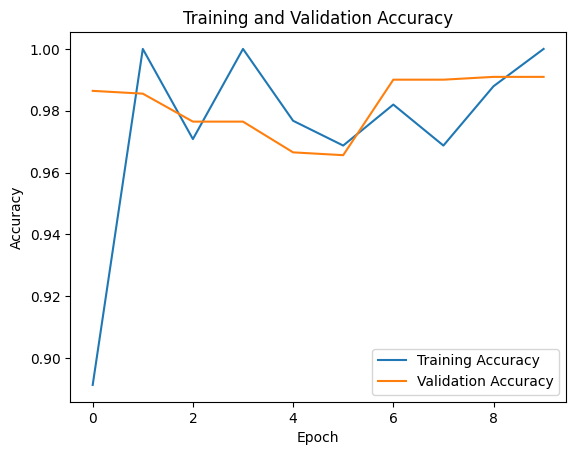

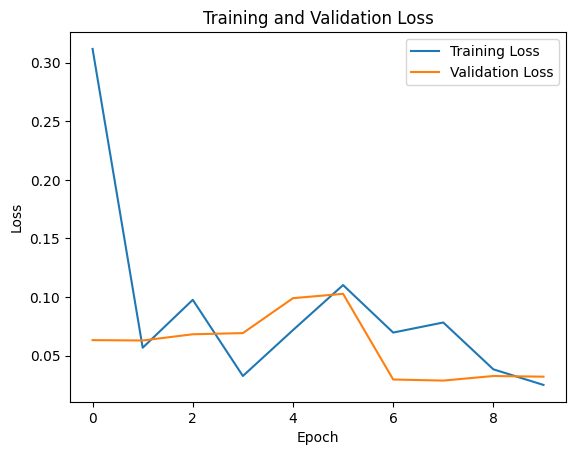

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9872 - loss: 0.0432
Test Loss: 0.032059382647275925
Test Accuracy: 0.9909583926200867
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step
              precision    recall  f1-score   support

  Microscopy       0.99      0.98      0.98       297
     BlotGel       0.98      0.99      0.99       273
        FACS       1.00      1.00      1.00       280
  Macroscopy       1.00      1.00      1.00       256

    accuracy                           0.99      1106
   macro avg       0.99      0.99      0.99      1106
weighted avg       0.99      0.99      0.99      1106

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


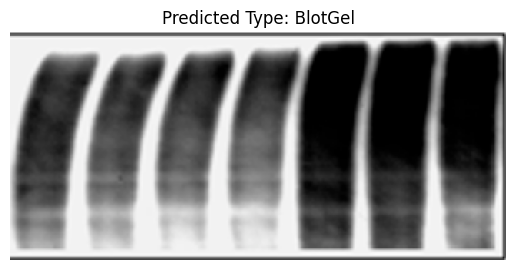

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


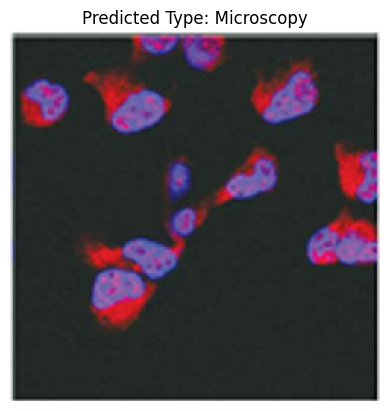

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


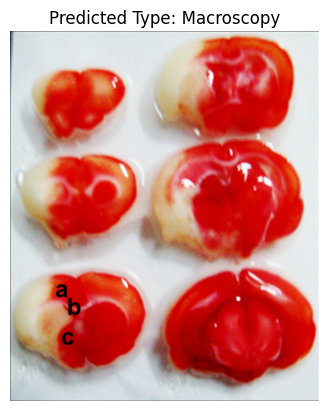

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


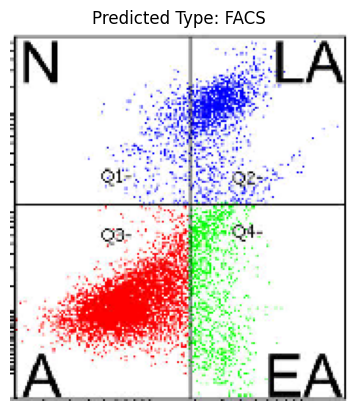

Predicted Types for the Four Images:
Image 1: BlotGel
Image 2: Microscopy
Image 3: Macroscopy
Image 4: FACS


In [4]:
# Importing Necessary Libraries
import os
import cv2
import numpy as np
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.applications import DenseNet121
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Function to load images and their labels
def load_images_from_directory(directory, subdirectories):
    images = []
    labels = []
    for subdir_name in subdirectories:
        subdir_path = os.path.join(directory, subdir_name)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                if filename.endswith('.png'):
                    img_path = os.path.join(subdir_path, filename)
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, (224, 224))
                    images.append(img)
                    labels.append(subdir_name)
    return np.array(images), np.array(labels)

# The images are classified into 4 sub directories each with names given below
subdirectories = ['Microscopy', 'BlotGel', 'FACS', 'Macroscopy']

main_dir = '/kaggle/input/biofors2/biofors2'  # Update this with relevant directory
images, labels = load_images_from_directory(main_dir, subdirectories)

# Convert labels to integer indices
label_map = {name: i for i, name in enumerate(subdirectories)}
labels = np.array([label_map[label] for label in labels])

# Apply SMOTE to handle class imbalances
smote = SMOTE()
images_resampled, labels_resampled = smote.fit_resample(images.reshape(-1, 224 * 224 * 3), labels)

images_resampled = images_resampled.reshape(-1, 224, 224, 3)

# Spliting data into training and test
X_train, X_test, y_train, y_test = train_test_split(images_resampled, labels_resampled, test_size=0.2, random_state=42)

# Normalizing pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Pre-trained DenseNet model with weights trained on ImageNet
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some layers in the base DenseNet model
for layer in base_model.layers[-10:]:
    layer.trainable = True

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(subdirectories), activation='softmax')
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Define checkpoint callback to save model
checkpoint_path = 'model_checkpoint.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint_callback = callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_best_only=True)

batch_size = 32
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_callback],
                    verbose=1)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes, target_names=subdirectories))

# Directory containing the images to test with
test_image_dir = '/kaggle/input/biofors-test/biofors_test'

predicted_types = []

for filename in os.listdir(test_image_dir):
    if filename.endswith('.png'):
        img_path = os.path.join(test_image_dir, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32') / 255.0
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)
        predicted_type = subdirectories[predicted_class]
        predicted_types.append(predicted_type)
        # Output the image and predicted type
        plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
        plt.title(f"Predicted Type: {predicted_type}")
        plt.axis('off')
        plt.show()

# Print the predicted types
print("Predicted Types for the Four Images:")
for i, predicted_type in enumerate(predicted_types, 1):
    print(f"Image {i}: {predicted_type}")